# Clustering 

In [33]:
import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
background_cmap2 = ListedColormap(['#a6cdf6','#b2d0b7'])

dots_cmap = ListedColormap(['#1b80e8','#599062','#e20c32'])
plt.register_cmap(cmap=background_cmap3)
plt.register_cmap(cmap=dots_cmap)

colors = ['#1b80e8','#599062','#e20c32']
colors2 = ['#1b80e8','#599062','#e20c32', 'f98ea1']

point_size = 40
line_width = 4

import warnings 
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [34]:
# random seed
random_seed = 1234

# propiedades
fig_width = 12
fig_height = 9
fig_font_size = 16

# Dataset

In [35]:
iris = datasets.load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [36]:
target = np.array(iris.target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
print("Numero de data: ", iris.data.shape[0])
print("Numero de variables: ", iris.data.shape[0])
print("Nombres de variables: ", iris.feature_names)
print("Valores objectivo: ", iris.target_names)
print("Distribucion por clase: ", [(x,sum(target==x)) for x in np.unique(target)])

Numero de data:  150
Numero de variables:  150
Nombres de variables:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Valores objectivo:  ['setosa' 'versicolor' 'virginica']
Distribucion por clase:  [(0, 50), (1, 50), (2, 50)]


In [38]:
X = iris.data[:,[2,3]]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [39]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist, pdist

import matplotlib
%matplotlib inline

color_palette1 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2],plt.cm.Paired.colors[4]], name='DecisionSurfaceColorMap')
color_palette2 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3],plt.cm.Paired.colors[5]], name='DataPointsColorMap')


### Grid

In [41]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

#resolucion
h = .01

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

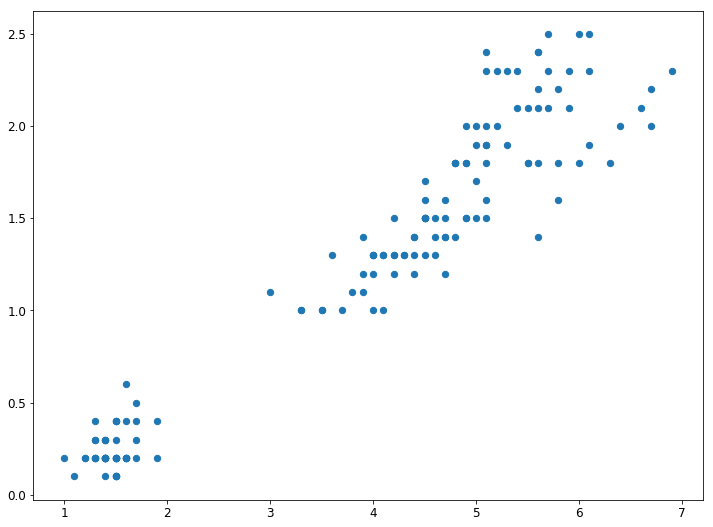

In [42]:
plt.figure(figsize=(12, 9))
plt.rc('font',**{'family' : 'sans','size':24})
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.scatter(X[:, 0], X[:,1], s=point_size)

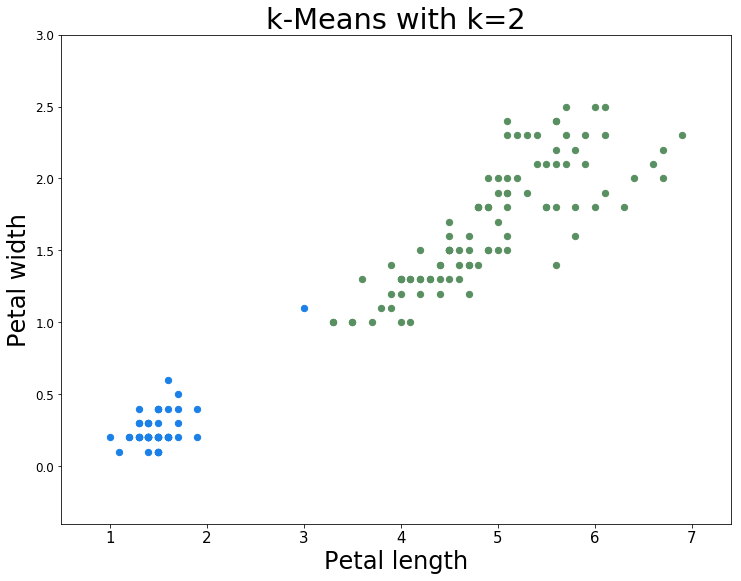

In [43]:
yp = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(12,9))

plt.rc('font',**{'family':'sans','size':24})
plt.rc('xtick',labelsize=15)

for i in [0,1,2]:
    idx = np.where(np.array(yp)==i)
    plt.scatter(X[idx,0],X[idx,1], s=point_size,c=colors2[i])
    
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title('k-Means with k=2')
plt.show();

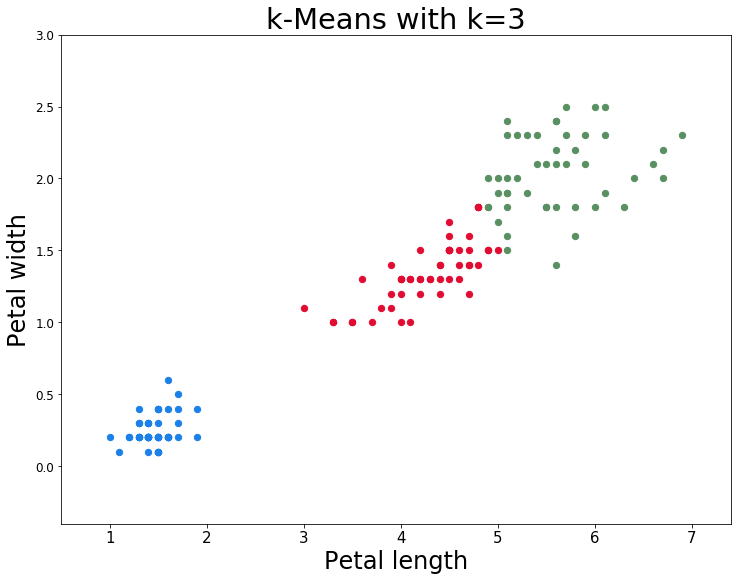

In [44]:
yp = KMeans(n_clusters=3).fit_predict(X)

plt.figure(figsize=(12,9))

plt.rc('font',**{'family':'sans','size':24})
plt.rc('xtick',labelsize=15)

for i in [0,1,2]:
    idx = np.where(np.array(yp)==i)
    plt.scatter(X[idx,0],X[idx,1], s=point_size,c=colors2[i])
    
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title('k-Means with k=3')
plt.show();

## Dos clases

In [45]:
y2 = [0 if (x==0) else 1 for x in iris.target]
y2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

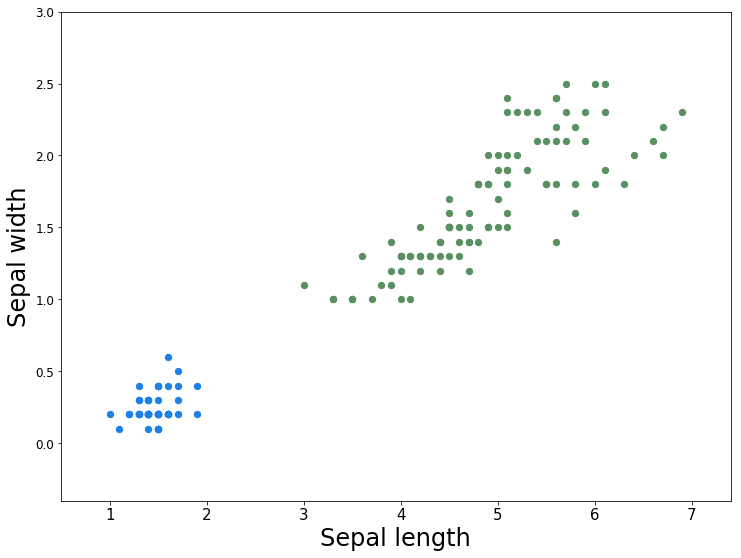

In [46]:
plt.figure(figsize=(12, 9))

plt.rc('font', **{'family' : 'sans', 'size'   : 24})
plt.rc('xtick', labelsize=15)

for i in [0,1]:
    idx = np.where(np.array(y2)==i)
    plt.scatter(X[idx, 0], X[idx, 1], s=point_size, c=colors2[i]) 

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show();

In [47]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [48]:
y2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [49]:
lr = linear_model.LogisticRegression(C=10e10, random_state=1234)
lr.fit(X,y2);

In [50]:
z = lr.predict(np.c_[xx.ravel(),yy.ravel()])

z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

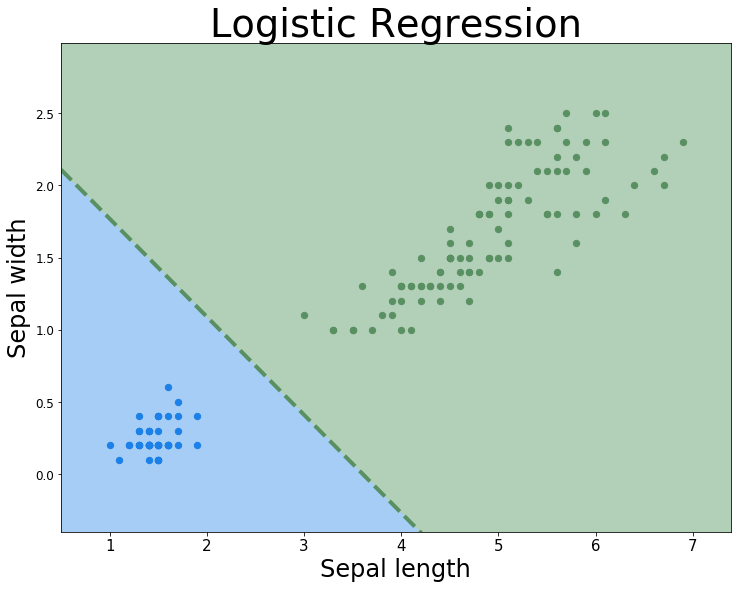

In [51]:
plt.figure(1, figsize=(12,9))

plt.pcolormesh(xx,yy,z,cmap=background_cmap2)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(lr.classes_, colors2):
    idx = np.where(y2==i)
    plt.scatter(X[idx,0],X[idx,1], s=point_size, c=color)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

coef = lr.coef_
intercept = lr.intercept_

def line(x):
    return (-(x*coef[0][0]) - intercept)/coef[0][1]

plt.plot([x_min, x_max], [line(x_min), line(x_max)], ls='--', lw=line_width, color=color)

plt.title("Logistic Regression")

plt.show()

## Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X, y2)

In [53]:
z = dt.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

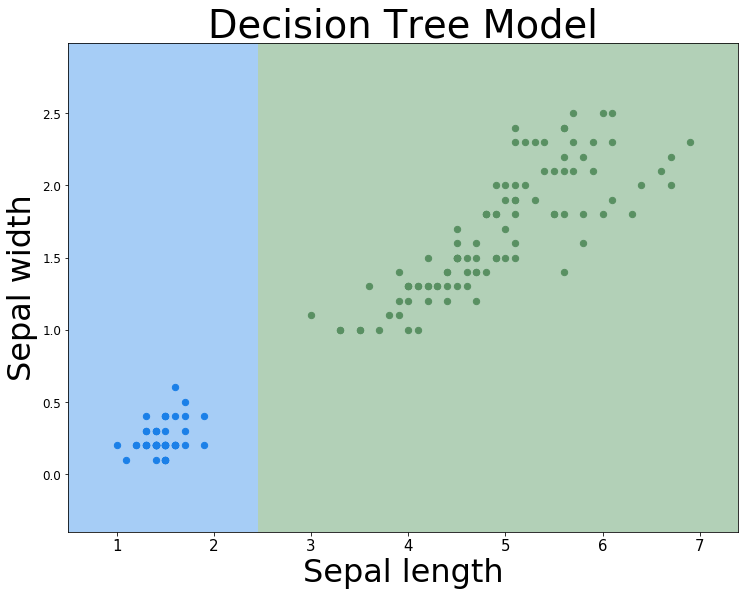

In [54]:
plt.figure(1, figsize=(12,9))
plt.pcolormesh(xx, yy, z, cmap=background_cmap2)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(lr.classes_,colors2):
    idx = np.where(y2==i)
    plt.scatter(X[idx,0], X[idx,1], s=point_size,c=color)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.title("Decision Tree Model")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show();

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5,'uniform').fit(X,y2)

In [56]:
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

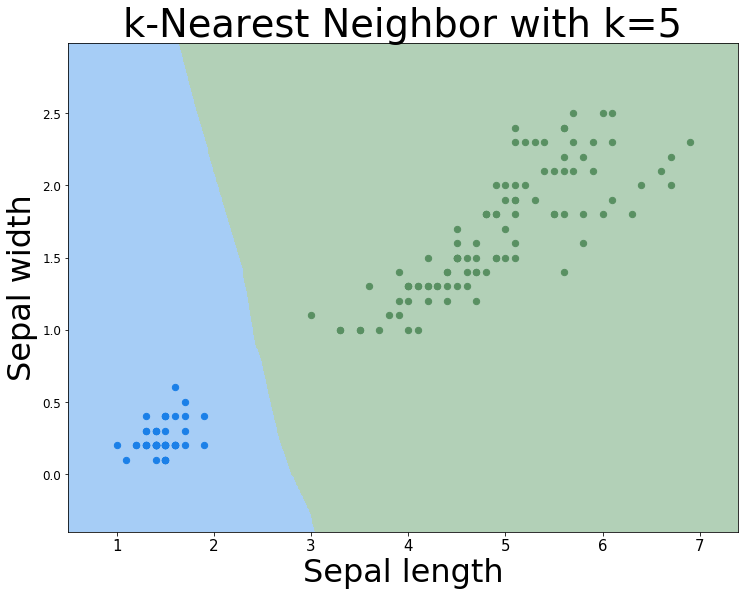

In [57]:
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, z, cmap=background_cmap2)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(lr.classes_,colors2):
    idx = np.where(y2 == i)
    plt.scatter(X[idx,0], X[idx,1], s=point_size, c=color)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-Nearest Neighbor with k=5")
plt.show();

# Comparasion de diferentes algoritmos